### Task #4
(Image Quality Analysis – is based on materials of the lecture/lab on 06.10)
1. Collect the dataset of 20 color images from open sources. It can be various  images of people/pets/nature/city etc.
2. Sort these images in the descending order according to your personal opinion about its perceptual quality https://en.wikipedia.org/wiki/Image_quality. For example, mark them from 5 to 1, where 5=excellent quality, 1=poor quality. Plot the marks as a captions for the images in the Notebook.
3.  Evaluate No-Reference image quality metrics TV, BRISQUE and NIMA estimating their quality (use, for example, implementations from https://github.com/photosynthesis-team/piq, https://github.com/aigagror/ML-Aesthetics-NIMA).
4. Compute Pearson correlation coefficients between the metric scores and your personal estimates.
5. Choose the best metric, which is more correlated with the human opinion.
6. Complete a task in a single Jupyter Notebook.


In [3]:
import warnings
warnings.filterwarnings(action='ignore')

import torch
from torch import nn
from PIL import Image
import os
import numpy as np

import matplotlib.pyplot as plt
import glob
import pandas as pd
import imageio
from scipy.stats.stats import pearsonr

ModuleNotFoundError: No module named 'matplotlib'

In [6]:
import warnings
warnings.filterwarnings(action='ignore')

In [7]:
import os

base_directory = './data/'
dataset = []

# our marks ranges from 2 to 5
for mark in range(2, 6):
    mark_directory = os.path.join(base_directory, str(mark))

    if os.path.exists(mark_directory) and os.path.isdir(mark_directory):
        files = os.listdir(mark_directory)

        for file in files:
            file_path = os.path.join(mark_directory, file)
            dataset.append({'name': file, 'path': file_path, 'mark': str(mark)})


## the data marked based on the resolution and perceptual quality.

In [8]:
df = pd.DataFrame(dataset)
df = df.loc[df['name']!='.DS_Store']

## Plotting the data and marks

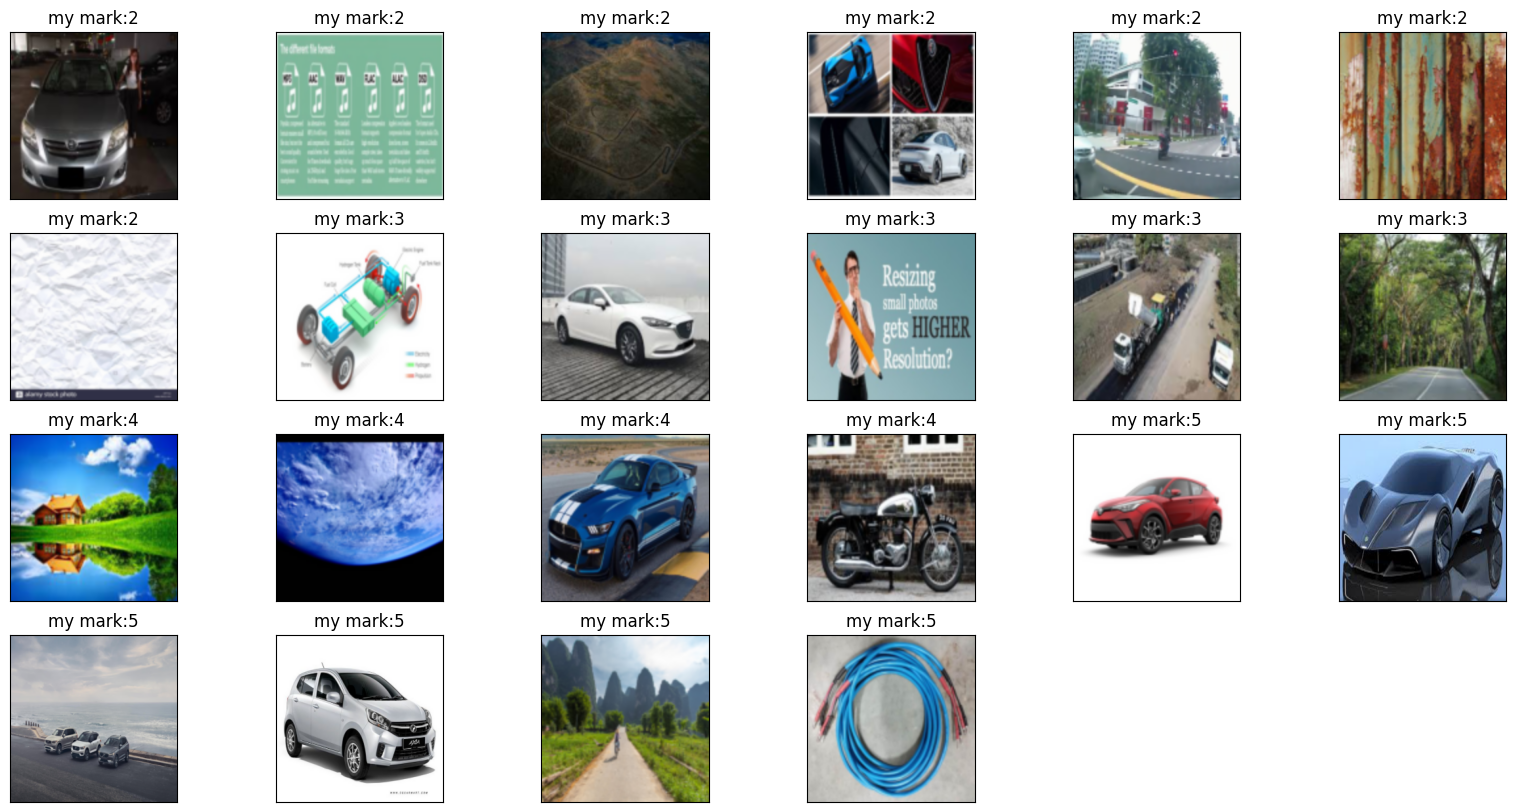

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for i in range(len(df)):
    image = plt.imread(df.iloc[i, 1])
    plt.subplot(4, 6, i + 1)
    plt.imshow(image)
    plt.title(f'Perceptual Quality:{df.iloc[i, 2]}')
    plt.xticks([])
    plt.yticks([])

## 3.  Evaluate No-Reference image quality metrics TV, BRISQUE and NIMA estimating their quality (use, for example, implementations from https://github.com/photosynthesis-team/piq, https://github.com/aigagror/ML-Aesthetics-NIMA).

In [36]:
from brisque import BRISQUE
brisq = BRISQUE()

In [37]:
df

,name,path,mark
0,58.png,./data/2/58.png,2
1,64.png,./data/2/64.png,2
2,40.png,./data/2/40.png,2
3,33.png,./data/2/33.png,2
4,74.png,./data/2/74.png,2
5,26.png,./data/2/26.png,2
6,39.png,./data/2/39.png,2
7,109.png,./data/3/109.png,3
8,108.png,./data/3/108.png,3
9,38.png,./data/3/38.png,3


## Get BRISQUE metric

In [41]:
brisq_scores = []
for i in df.path.values:
  brisq_scores.append(brisq.get_score(i))

df['brisq'] = brisq_scores

## Getting TV metric

In [50]:
import cv2
import numpy as np

def calculate_tv_score(image_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Failed to load the image at {image_path}")
        return None

    # Calculate the Total Variation (TV) score
    tv_score = np.sum(np.abs(np.gradient(image)))

    return tv_score

# List of image paths
image_paths = df.path.values

# Calculate TV scores for each image
tv_scores = []
for image_path in image_paths:
    tv_score = calculate_tv_score(image_path)
    if tv_score is not None:
        tv_scores.append(tv_score)

df['TV'] = np.array(tv_scores)/10000 # make it easier to compare

In [51]:
df

,name,path,mark,brisq,TV
0,58.png,./data/2/58.png,2,51.491821,204.70490
1,64.png,./data/2/64.png,2,59.119150,679.78640
2,40.png,./data/2/40.png,2,41.760929,245.46230
3,33.png,./data/2/33.png,2,43.458630,488.78780
4,74.png,./data/2/74.png,2,50.853736,397.87650
5,26.png,./data/2/26.png,2,31.857708,816.23770
6,39.png,./data/2/39.png,2,50.173872,173.88305
7,109.png,./data/3/109.png,3,56.548604,268.74180
8,108.png,./data/3/108.png,3,68.268695,212.15985
9,38.png,./data/3/38.png,3,51.599345,582.04945


## Getting NIMA scores

In [52]:
!wget https://github.com/titu1994/neural-image-assessment/blob/master/weights/mobilenet_weights.h5

--2023-11-08 10:00:04--  https://github.com/titu1994/neural-image-assessment/blob/master/weights/mobilenet_weights.h5
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6055 (5.9K) [text/plain]
Saving to: ‘mobilenet_weights.h5.1’

mobilenet_weights.h 100%[===================>]   5.91K  --.-KB/s    in 0s      

2023-11-08 10:00:05 (43.1 MB/s) - ‘mobilenet_weights.h5.1’ saved [6055/6055]



In [60]:
from keras.models import Model
from keras.layers import Dense, Dropout
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

# calculate mean score for AVA dataset
def mean_score(scores):
    si = np.arange(1, 11, 1)
    mean = np.sum(scores * si)
    return mean

# calculate standard deviation of scores for AVA dataset
def std_score(scores):
    si = np.arange(1, 11, 1)
    mean = mean_score(scores)
    std = np.sqrt(np.sum(((si - mean) ** 2) * scores))
    return std

imgs = df.path.values

with tf.device('/CPU:0'):
    base_model = MobileNet((None, None, 3), alpha=1, include_top=False, pooling='avg', weights=None)
    x = Dropout(0.75)(base_model.output)
    x = Dense(10, activation='softmax')(x)

    model = Model(base_model.input, x)
    model.load_weights('./mobilenet_weights.h5')

    score_list = []

    for img_path in imgs:
        img = load_img(img_path, target_size=target_size)
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

        x = preprocess_input(x)

        scores = model.predict(x, batch_size=1, verbose=0)[0]

        mean = mean_score(scores)
        std = std_score(scores)

        file_name = Path(img_path).name.lower()
        score_list.append((file_name, mean))

        print("Evaluating : ", img_path)
        print("NIMA Score : %0.3f +- (%0.3f)" % (mean, std))
        print()

    if rank_images:
        print("*" * 40, "Ranking Images", "*" * 40)
        score_list = sorted(score_list, key=lambda x: x[1], reverse=True)

        for i, (name, score) in enumerate(score_list):
            print("%d)" % (i + 1), "%s : Score = %0.5f" % (name, score))



OSError: ignored

In [59]:
!ls

data  dense121_all.pt  mobilenet_weights.h5  mobilenet_weights.h5.1  sample_data
